TODO:
 - sa adaug count labels pt fiecare plot si sa ster celulele in care printam count ul

### Libraries

In [168]:
#dataset download
import opendatasets as od

#data
import numpy as np
import pandas as pd
import country_converter as coco

#visualization
import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from wordcloud import WordCloud
import plotly.graph_objects as go


### Dataset description

In [169]:
od.download("https://www.kaggle.com/datasets/ruchi798/data-science-job-salaries/data", force=True)

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username:Your Kaggle Key:Downloading data-science-job-salaries.zip to .\data-science-job-salaries


100%|██████████| 7.37k/7.37k [00:00<00:00, 1.89MB/s]

In [170]:
df = pd.read_csv("data-science-job-salaries\ds_salaries.csv")

In [171]:
df.shape

(607, 12)

In [172]:
df.head(5)

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [173]:
df.columns.values

array(['Unnamed: 0', 'work_year', 'experience_level', 'employment_type',
       'job_title', 'salary', 'salary_currency', 'salary_in_usd',
       'employee_residence', 'remote_ratio', 'company_location',
       'company_size'], dtype=object)

Some labels that might be unclear:
 - Unnamed: the order of data in the csv file.
 - work_year: The year the salary was paid.
 - employee_residente: a country code.
 - remote_ratio: Amount of work done remotely.

In [174]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


- 607 entries
- We don't have any null values
- Only int and object types

Which features are not useful?
- "Unnamed" has no real use
- "salary" and "salary_currency" are not needed because we already have "salary_in_usd"

### Data preparation

In [175]:
df.drop(['Unnamed: 0', 'salary', 'salary_currency'], axis=1, inplace=True)

In [176]:
df.shape

(607, 9)

## Analysis

### Univariate analysis

We will explore these 6 categorical columns:

- experience level
- job titles
- employment type
- employment residence
- company location
- company size

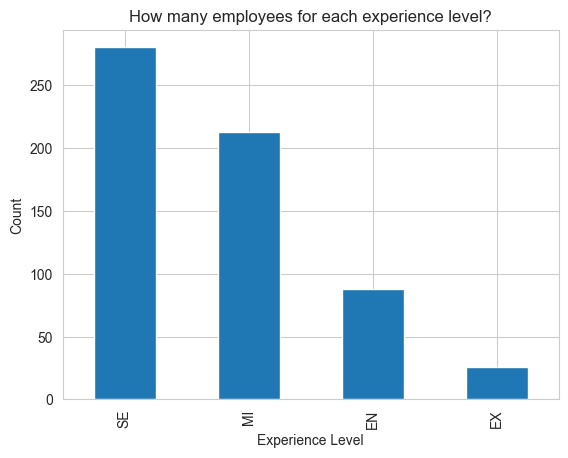

In [177]:
df['experience_level'].value_counts().plot(kind='bar')
plt.xlabel('Experience Level')
plt.ylabel('Count')
plt.title('How many employees for each experience level?')
plt.show()


In [178]:
df['experience_level'].value_counts()

experience_level
SE    280
MI    213
EN     88
EX     26
Name: count, dtype: int64

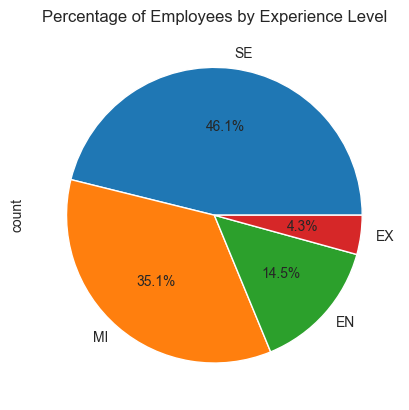

In [179]:
experience_counts = df['experience_level'].value_counts()
experience_percentages = experience_counts / df.shape[0] * 100

experience_percentages.plot.pie(autopct='%1.1f%%')
plt.title('Percentage of Employees by Experience Level')
plt.show()

How many employees are for each experience level?

- 88 Entry-level/Juniors (EN)
- 213 Mid-Level/Intermediates (MI)
- 280 Senior-Level/Experts (SE)
- 26 Executive-Level/Director (EX)

46.1% Experts, 35.1% Intermediates, 14.5% Juniors, 4.3% Directors

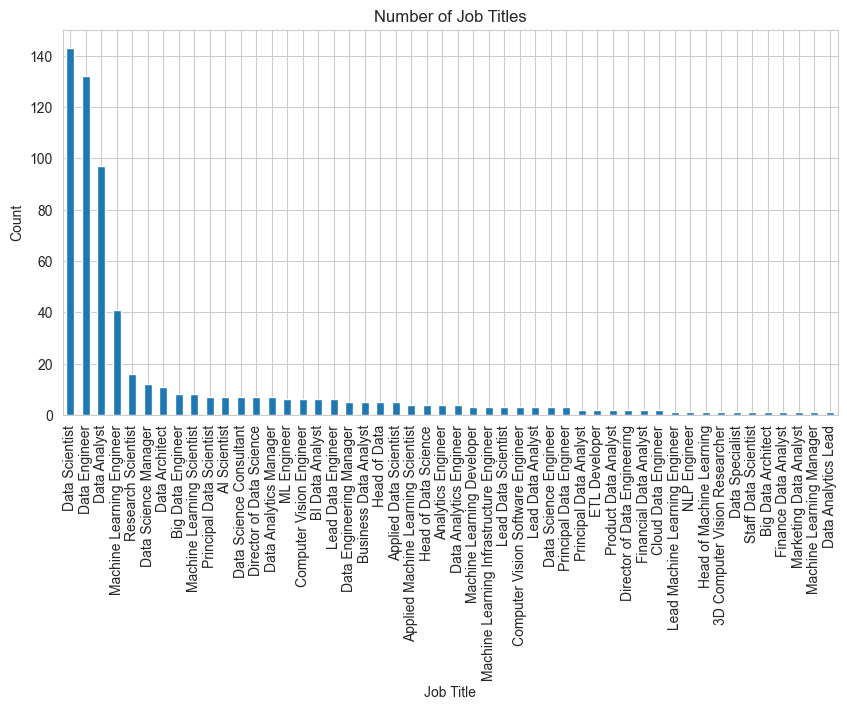

In [180]:
df['job_title'].value_counts().plot(kind='bar', width=0.5, figsize=(10, 5))
plt.xlabel('Job Title')
plt.ylabel('Count')
plt.title('Number of Job Titles')
plt.show()


In [181]:
print('Number of job titles: ',df['job_title'].value_counts().size)

Number of job titles:  50


In [182]:
df['job_title'].value_counts()

job_title
Data Scientist                              143
Data Engineer                               132
Data Analyst                                 97
Machine Learning Engineer                    41
Research Scientist                           16
Data Science Manager                         12
Data Architect                               11
Big Data Engineer                             8
Machine Learning Scientist                    8
Principal Data Scientist                      7
AI Scientist                                  7
Data Science Consultant                       7
Director of Data Science                      7
Data Analytics Manager                        7
ML Engineer                                   6
Computer Vision Engineer                      6
BI Data Analyst                               6
Lead Data Engineer                            6
Data Engineering Manager                      5
Business Data Analyst                         5
Head of Data                  

In [183]:
job_title_percentages = df['job_title'].value_counts() / df.shape[0] * 100
job_title_percentages

job_title
Data Scientist                              23.558484
Data Engineer                               21.746293
Data Analyst                                15.980231
Machine Learning Engineer                    6.754530
Research Scientist                           2.635914
Data Science Manager                         1.976936
Data Architect                               1.812191
Big Data Engineer                            1.317957
Machine Learning Scientist                   1.317957
Principal Data Scientist                     1.153213
AI Scientist                                 1.153213
Data Science Consultant                      1.153213
Director of Data Science                     1.153213
Data Analytics Manager                       1.153213
ML Engineer                                  0.988468
Computer Vision Engineer                     0.988468
BI Data Analyst                              0.988468
Lead Data Engineer                           0.988468
Data Engineering M

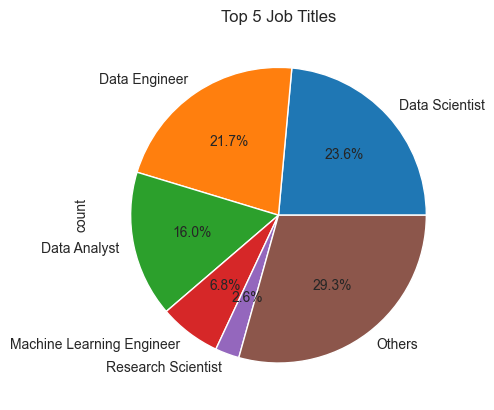

In [184]:
top_5_job_titles = df['job_title'].value_counts().head(5)
others_count = df['job_title'].value_counts().sum() - top_5_job_titles.sum()
top_5_job_titles['Others'] = others_count

top_5_job_titles.plot.pie(autopct='%1.1f%%')
plt.title('Top 5 Job Titles')
plt.show()


Top 5 job titles:
- Data scientist (23.6%) 
- Data engineer (21.7%)
- Data analysts(16%) 
- Machine learning engineer(6.8%)

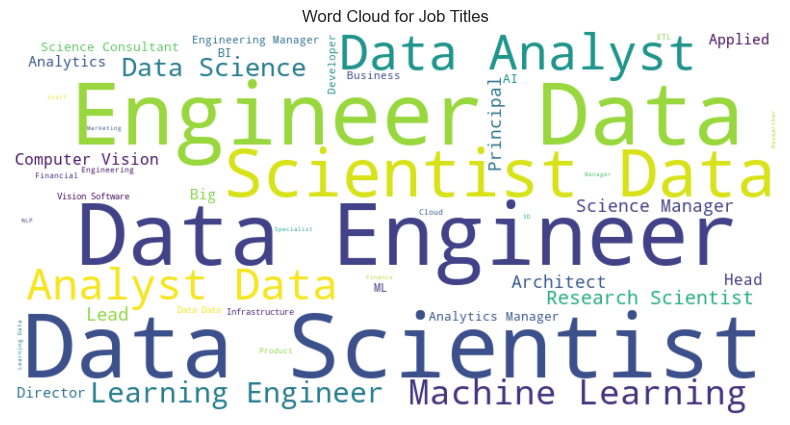

In [185]:
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['job_title']))

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud for Job Titles')
plt.show()


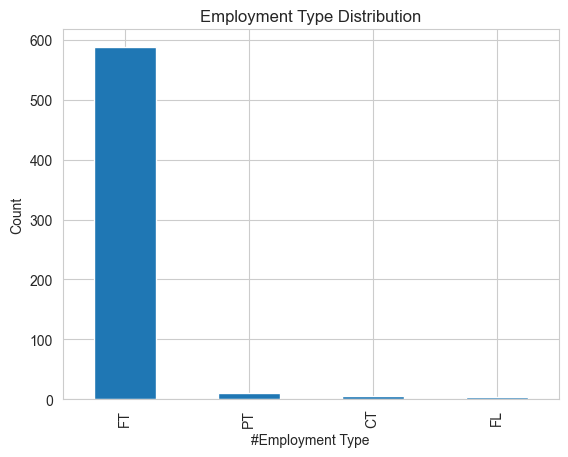

In [186]:
df['employment_type'].value_counts().plot(kind='bar')
plt.xlabel('#Employment Type')
plt.ylabel('Count')
plt.title('Employment Type Distribution')
plt.show()

In [187]:
df['employment_type'].value_counts()

employment_type
FT    588
PT     10
CT      5
FL      4
Name: count, dtype: int64

About employment type:
 - nearly all employees are working Full Time (588 out of 607)

In [188]:
converted_country = coco.convert(names=df['employee_residence'], to="ISO3")
df['employee_residence'] = converted_country

In [189]:
residence = df['employee_residence'].value_counts()
fig = px.choropleth(locations=residence.index,
                    color=residence.values,
                    color_continuous_scale=px.colors.sequential.YlGn,
                    title = 'Employee residence Distribution Map')

fig.show()


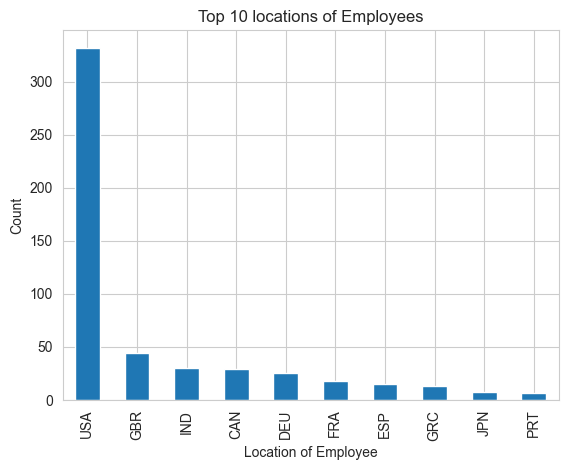

In [190]:
df['employee_residence'].value_counts().head(10).plot(kind='bar')
plt.xlabel('Location of Employee')
plt.ylabel('Count')
plt.title('Top 10 locations of Employees')
plt.show()


About the location of employees:
 - Most employees are located in USA

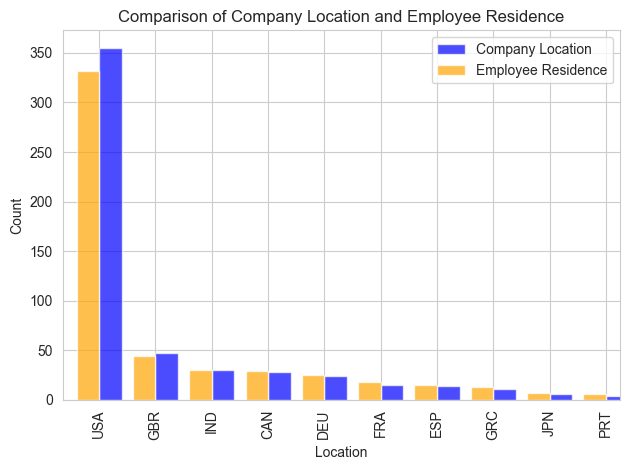

In [191]:
df['company_location'].value_counts().head(10).plot(kind='bar', color='blue', alpha=0.7, label='Company Location', position=0, width=0.4)
df['employee_residence'].value_counts().head(10).plot(kind='bar', color='orange', alpha=0.7, label='Employee Residence', position=1, width=0.4)

plt.xlabel('Location')
plt.ylabel('Count')
plt.title('Comparison of Company Location and Employee Residence')
plt.legend()
plt.tight_layout()
plt.show()


About employee residence and company location:
 - Most employees work for companies that are located in the same country as them
 - USA has the most employees that are not located in the country of the company

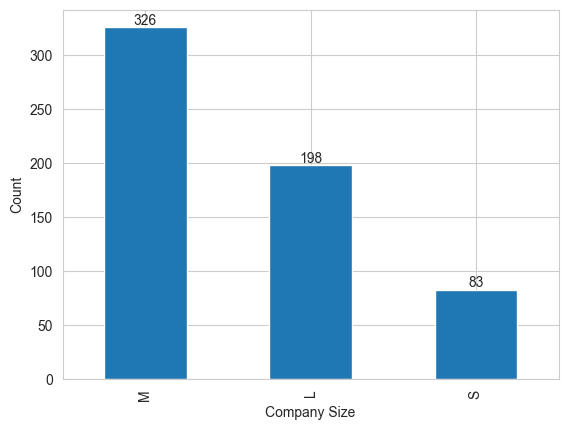

In [192]:
company_sizes = df['company_size'].value_counts().plot(kind='bar')

company_sizes.bar_label(company_sizes.containers[0])

plt.xlabel('Company Size')
plt.ylabel('Count')
plt.show()

About company sizes:
 - Most companies are medium size, followed by large size

We will explore these 3 numeric columns:
 - work_year
 - salary_in_usd
 - remote_ratio

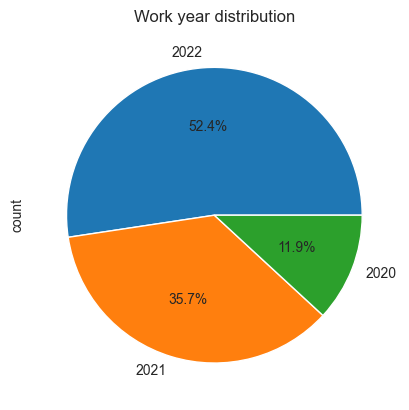

In [193]:
work_year_distribution = df['work_year'].value_counts()
work_year_percentages = work_year_distribution / df.shape[0] * 100

work_year_percentages.plot.pie(autopct='%1.1f%%')
plt.title('Work year distribution')
plt.show()

About work year distribution:
- 2022 year data accounts for 52.4%, followed by 2021 which is 35.7%.

In [194]:
fig = px.box(y=df['salary_in_usd'],template= 'plotly_dark', title = 'Salary distribution BoxPlot')

fig.show()

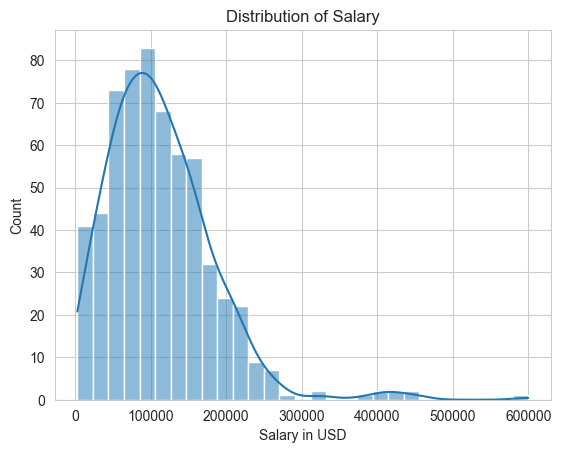

In [195]:
sns.histplot(data=df, x='salary_in_usd', kde=True)
plt.xlabel('Salary in USD')
plt.ylabel('Count')
plt.title('Distribution of Salary')
plt.show()

About salary_in_usd:
 - average salary is around 100k
 - skewed distribution

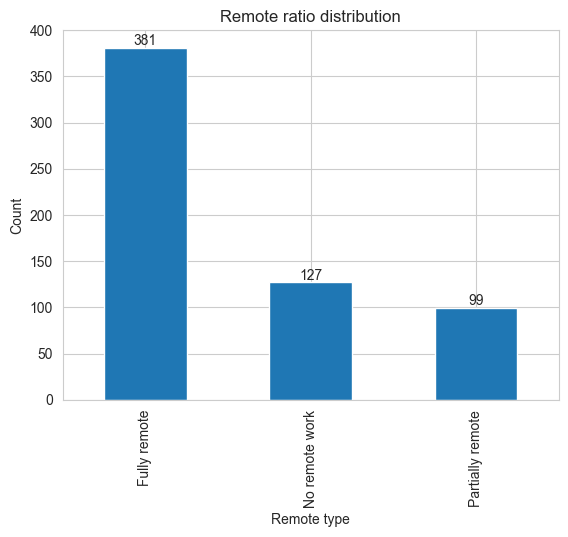

In [196]:
remote_ratio_distribution = df['remote_ratio'].value_counts().plot(kind='bar')

remote_ratio_distribution.bar_label(remote_ratio_distribution.containers[0])

plt.title('Remote ratio distribution')
plt.xlabel('Remote type')
plt.ylabel('Count')

plt.xticks([0, 1, 2], ['Fully remote', 'No remote work', 'Partially remote'])

plt.show()

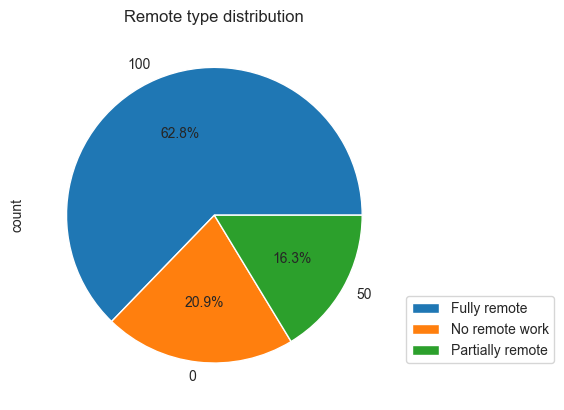

In [197]:
remote_type_distribution = df['remote_ratio'].value_counts()
remote_type_percentages = remote_type_distribution / df.shape[0] * 100

remote_type_percentages.plot.pie(autopct='%1.1f%%')
plt.title('Remote type distribution')

plt.legend(['Fully remote', 'No remote work', 'Partially remote'], bbox_to_anchor=(1, 0.3))

plt.show()

About remote_ratio:
 - More than half of the employees work fully remote (381 out of 607)

In [198]:
remote_ratio_by_work_year = df.groupby(['work_year','remote_ratio']).size()

ratio_2020 = np.round(remote_ratio_by_work_year[2020].values / remote_ratio_by_work_year[2020].sum(), 2)
ratio_2021 = np.round(remote_ratio_by_work_year[2021].values / remote_ratio_by_work_year[2021].sum(), 2)
ratio_2022 = np.round(remote_ratio_by_work_year[2022].values / remote_ratio_by_work_year[2022].sum(), 2)

fig = go.Figure()
categories = ['No remote', 'Partially remote', 'Fully remote']

fig.add_trace(go.Scatterpolar(
    r = ratio_2020,
    theta = categories,
    fill = 'toself',
    name = "2020 remote ratio"
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2021,
    theta = categories,
    fill = 'toself',
    name = "2021 remote ratio"
))

fig.add_trace(go.Scatterpolar(
    r = ratio_2022,
    theta = categories,
    fill = 'toself',
    name = "2022 remote ratio"
))

fig.update_layout(
  polar=dict(
    radialaxis=dict(
      visible=True,
      range=[0, 0.75]
    )),
  showlegend=True,
  title = 'Remote ratio by work year'
)

fig.layout.template = 'plotly_dark'
fig.show()

About remote ratio for each year:
 - fully remote work in 2022 by 72% of companies (maybe because of Covid)

In [199]:
experience_level = df.groupby(['experience_level','employment_type']).size()
fig = go.Figure(data=[
    go.Bar(name='Entry-level/Junior', x=experience_level['EN'].index, y=experience_level['EN'].values,
           text=experience_level['EN'].values),
    go.Bar(name='Executive-level/Director', x=experience_level['EX'].index, y=experience_level['EX'].values,
           text=experience_level['EX'].values),
    go.Bar(name='Mid-level/Intermediate', x=experience_level['MI'].index, y=experience_level['MI'].values,
           text=experience_level['MI'].values),
    go.Bar(name='Senior-level/Expert', x=experience_level['SE'].index, y=experience_level['SE'].values,
           text=experience_level['SE'].values)])
fig.update_layout(xaxis_tickangle=-45, title='Employment type based on experience', template='plotly_dark')

fig.show()


About experience level of employees based on employment type:
 - Only entry-level and mid-level do part time
 - Only mid-level and senior-level do freelance 

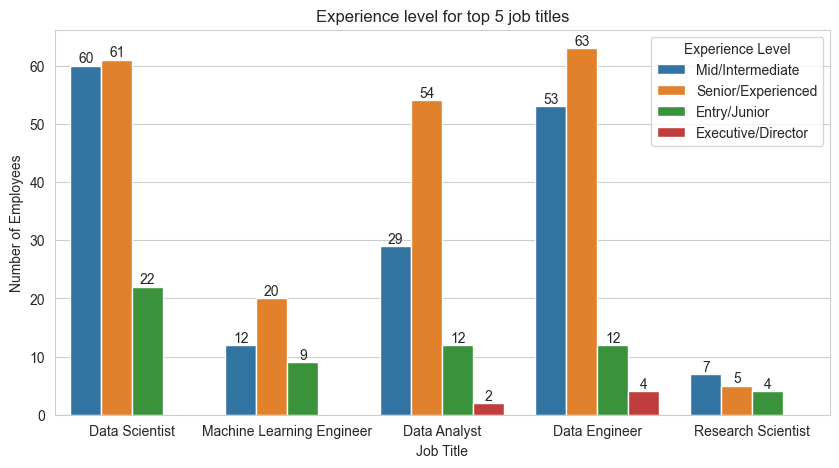

In [200]:
top_5_jobs = df['job_title'].value_counts().head(5).index
data = df[df['job_title'].isin(top_5_jobs)]

plt.figure(figsize=(10, 5))

ax = sns.countplot(data=data, x='job_title', hue='experience_level')

for bars in ax.containers:
    ax.bar_label(bars)

plt.xlabel('Job Title')
plt.ylabel('Number of Employees')
plt.title('Experience level for top 5 job titles')

legend_labels = ['Mid/Intermediate', 'Senior/Experienced', 'Entry/Junior', 'Executive/Director']
plt.legend(title='Experience Level', labels=legend_labels)

plt.show()


About experience level for top 5 job titles:
- Entry-level/junior usually starts as a data scientist
- There are more Senior/Experienced employees than Mid/Intermediate for each job title, apart from research scientist


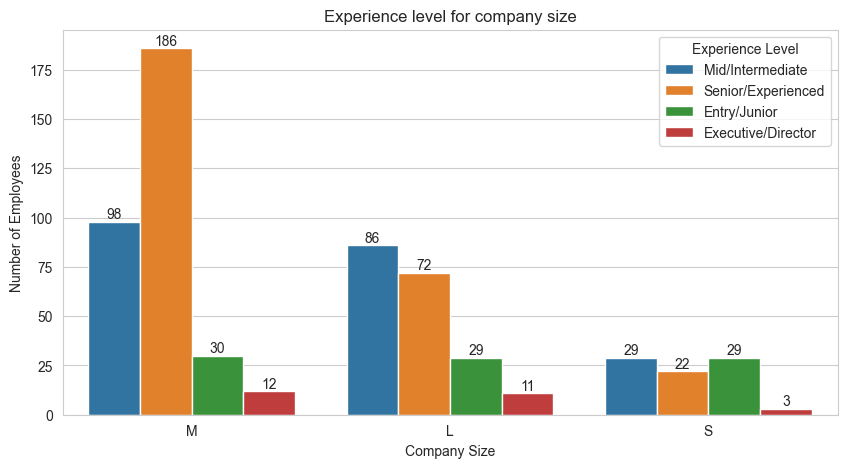

In [201]:
company_size = df['company_size'].value_counts().index

plt.figure(figsize=(10, 5))
ax = sns.countplot(data=df, x='company_size', hue='experience_level', order=company_size)

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Company Size')
plt.ylabel('Number of Employees')
plt.title('Experience level for company size')

legend_labels = ['Mid/Intermediate', 'Senior/Experienced', 'Entry/Junior', 'Executive/Director']
plt.legend(title='Experience Level', labels=legend_labels)

plt.show()

About experience level of employees for company size:
 - More than half of seniors work for a medium company
 - There are more workers for medium companies rather than large companyes because there is a bigger number of medium companies
 - Small companies have a smaller number of employees, probably because their limited resources. Also, there are fewer smaller companies

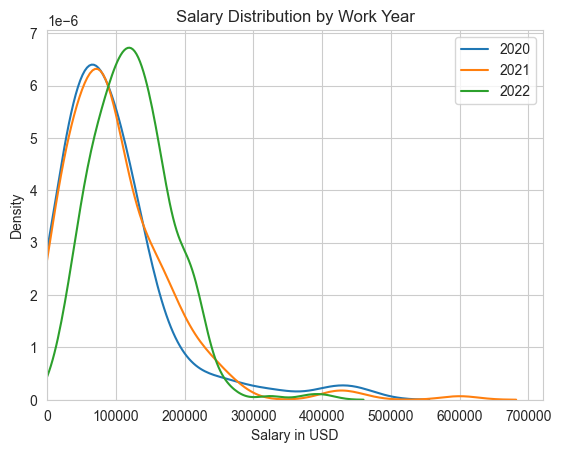

In [202]:
year_2020 = df.loc[(df['work_year'] == 2020)]
year_2021 = df.loc[(df['work_year'] == 2021)]
year_2022 = df.loc[(df['work_year'] == 2022)]

sns.set_style('whitegrid')

sns.kdeplot(data=year_2020['salary_in_usd'], label='2020')
sns.kdeplot(data=year_2021['salary_in_usd'], label='2021')
sns.kdeplot(data=year_2022['salary_in_usd'], label='2022')

plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Salary Distribution by Work Year')
plt.legend()

plt.xlim(0)

plt.show()


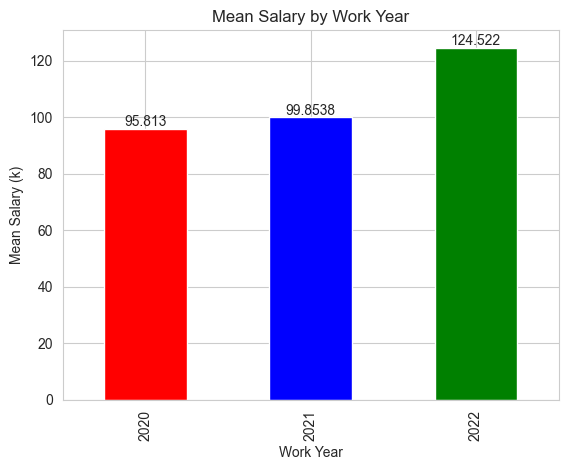

In [203]:
mean_salary_by_year = df.groupby('work_year')['salary_in_usd'].mean() / 1000 

ax = mean_salary_by_year.plot(kind='bar', color=['red', 'blue', 'green'])

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Work Year')
plt.ylabel('Mean Salary (k)')
plt.title('Mean Salary by Work Year')
plt.show()


About salary by work year:
 - higher salary amounts in 2022
 - 2020 and 2021 are similar

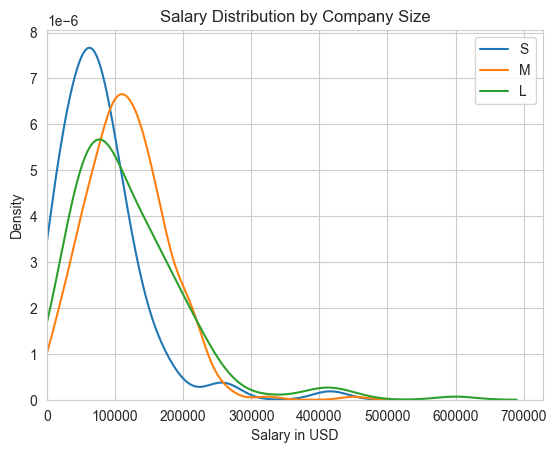

In [204]:
S_company = df.loc[(df['company_size'] == 'S')]
M_company = df.loc[(df['company_size'] == 'M')]
L_company = df.loc[(df['company_size'] == 'L')]

sns.set_style('whitegrid')

sns.kdeplot(data=S_company['salary_in_usd'], label='S')
sns.kdeplot(data=M_company['salary_in_usd'], label='M')
sns.kdeplot(data=L_company['salary_in_usd'], label='L')

plt.xlabel('Salary in USD')
plt.ylabel('Density')
plt.title('Salary Distribution by Company Size')
plt.legend()

plt.xlim(0)

plt.show()


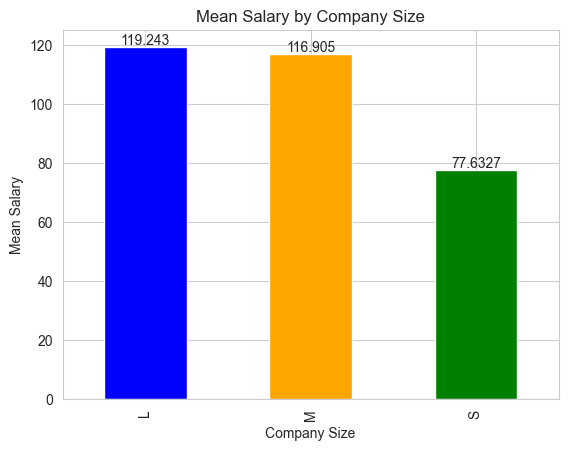

In [205]:
mean_salary_by_company_size = df.groupby('company_size')['salary_in_usd'].mean() / 1000

ax = mean_salary_by_company_size.plot(kind='bar', color=['blue', 'orange', 'green'])

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Company Size')
plt.ylabel('Mean Salary')
plt.title('Mean Salary by Company Size')
plt.show()


About salary by company size:
 - Mid sized companies have a higher distribution of salaries than a large size company
 - Small sized companies have the lowest salaries
 - Mean salaries are similar for mid and large sized companies

In [206]:
salary_job_highest = df.groupby(['salary_in_usd','job_title']).size().reset_index()
salary_job_highest = salary_job_highest.nlargest(10, 'salary_in_usd')

salary_job_avg = df.groupby(['job_title'])['salary_in_usd'].median().reset_index()
salary_job_avg = salary_job_avg.nlargest(10, 'salary_in_usd')

fig1 = px.bar(x=salary_job_highest['job_title'], y=salary_job_highest['salary_in_usd'], 
              text=salary_job_highest['salary_in_usd'], color=salary_job_highest['salary_in_usd'])

fig1.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Median Salaries",
    title='Top 10 Highest Salary by Job Title',
    template='plotly_dark')

fig1.show()

fig2 = px.bar(x=salary_job_avg['job_title'],y=salary_job_avg['salary_in_usd'],text = salary_job_avg['salary_in_usd'], 
                   color = salary_job_avg['salary_in_usd'])

fig2.update_layout(
    xaxis_title="Job Title",
    yaxis_title="Salaries ",
    title='Top 10 Average Salary by Job Title',
    template='plotly_dark')

fig2.show()

About top 10 average/highest salary by job title:
 - Highest salary for some job titles do not corespond with their average salaries. For example, principal data engineer has 600k highest salary, which is the highest out of all jobs, but is situated 4th for average salary (200k).
 - Also, Data scientist is situated 5th for highest salary, but doesn't break top 10 for average salary.
 - Another example would be that Head of Data is 3rd for average salary, but is not part of top 10 for highest salary.

In [220]:
converted_country = coco.convert(names=df['company_location'], to="ISO3")
df['company_location'] = converted_country

salary_location = df.groupby(['salary_in_usd','company_location']).size().reset_index()
average = salary_location.groupby('company_location').mean().reset_index()

fig = px.choropleth(locations=average['company_location'],
                    locationmode="ISO-3",
                    color=average['salary_in_usd'],
                    color_continuous_scale=px.colors.sequential.solar,
                    template='plotly_dark',
                    title = '6.5. Average Salary by Company Location')
fig.update_layout(font = dict(size=17,family="Franklin Gothic"))
fig.show()

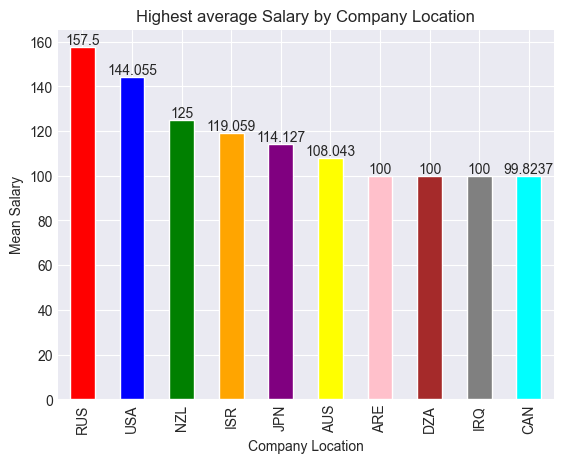

In [233]:
top_10_avg_salaries_country = df.groupby('company_location')['salary_in_usd'].mean().nlargest(10) / 1000

ax = top_10_avg_salaries_country.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Company Location')
plt.ylabel('Mean Salary')
plt.title('Highest average Salary by Company Location')

plt.show()

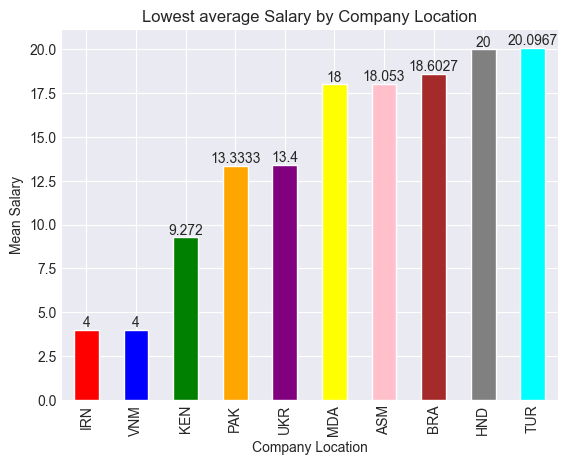

In [232]:
top_10_lowest_avg_salaries_country = df.groupby('company_location')['salary_in_usd'].mean().nsmallest(10) / 1000

ax = top_10_lowest_avg_salaries_country.plot(kind='bar', color=['red', 'blue', 'green', 'orange', 'purple', 'yellow', 'pink', 'brown', 'gray', 'cyan'])

for bars in ax.containers:
    ax.bar_label(bars)
    
plt.xlabel('Company Location')
plt.ylabel('Mean Salary')
plt.title('Lowest average Salary by Company Location')

plt.show()

About mean salary by company location:
 - Russia and USA have the highest average salaries
 - Iran and Vietnam have the lowest average salaries